In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
h = pd.read_csv("t3000/gen_n300_k3_l50_t3000_seed20_corrfix3_H.csv", header=None).values

In [3]:
w = np.array([
    pd.read_csv("t3000/gen_n300_k3_l50_t3000_seed20_corrfix3_W0.csv", header=None).values,
    pd.read_csv("t3000/gen_n300_k3_l50_t3000_seed20_corrfix3_W1.csv", header=None).values,
    pd.read_csv("t3000/gen_n300_k3_l50_t3000_seed20_corrfix3_W2.csv", header=None).values
])

In [4]:
x = pd.read_csv("t3000/gen_n300_k3_l50_t3000_seed20.csv", header=None).values

In [6]:
index = np.hstack([
    w[1, :100, :].argmax(axis=1).argsort(),
    w[2, 100:200, :].argmax(axis=1).argsort() + 100,
    w[0, 200:300, :].argmax(axis=1).argsort() + 200
])

In [8]:
h_th = h.mean(axis=0) + 3 * h.std(axis=0)
for i in range(3):
    h[h[:, i] > h_th[i], i] = h_th[i]

In [10]:
h /= h_th

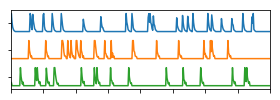

In [36]:
plt.figure(figsize=(4, 1.5))
plt.plot(h[1049:1449, 0] + 3)
plt.plot(h[1049:1449, 2] + 1.5)
plt.plot(h[1049:1449, 1])
plt.xlim(0, 400)
plt.xticks([50*i for i in range(9)])
plt.yticks([0.5, 2.0, 3.5])
plt.tick_params(labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig("paper/fig1/fig1g_h.png")

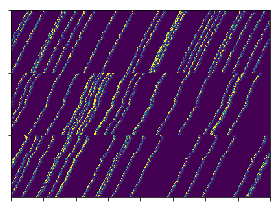

In [38]:
plt.figure(figsize=(4, 3))
plt.pcolor(x[1000:1400, index].T, vmin=0, vmax=x.mean()+3*x.std())
plt.xticks([50*i for i in range(9)])
plt.tick_params(labelleft=False, labelbottom=False)
plt.yticks([99.5, 199.5, 299.5])
plt.tight_layout()
plt.savefig("paper/fig1/fig1g_x.png")

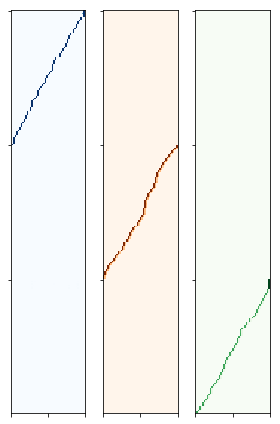

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(4, 6))
for i, (j, c) in enumerate([(0, "Blues"), (2, "Oranges"), (1, "Greens")]):
    ax[i].set_xticks([0, 25, 50])
    ax[i].set_xticklabels([0, 5, 10])
    th = w[j].mean() + 3 * w[j].std()
    ax[i].pcolor(w[j][index], vmin=0, vmax=th, cmap=c)
    ax[i].tick_params(labelleft=False, labelbottom=False)
    ax[i].set_yticks([99.5, 199.5, 299.5])
    ax[i].set_xticks([0, 25, 50])
plt.tight_layout()
plt.savefig("paper/fig1/fig1g_w.png")